In [44]:
import os
os.environ['MNE_DATASETS_wang2016_PATH'] = 'E:/dataset/'

In [45]:
import matplotlib.pyplot as plt
import mne
import numpy as np
from scipy.stats import ttest_rel
from braindecode.datasets import MOABBDataset

from moabb.datasets import Wang2016
import scipy.io
from mne.channels import make_standard_montage
from mne import create_info
from mne.io import RawArray
import moabb
import os

In [46]:
dataset = Wang2016()
subject =[1]
dataset.subject_list = subject

In [53]:
path = r"E:\MNE-tsinghua-data\upload\yijun\s1.mat"
raw_mat = scipy.io.loadmat(path)

In [55]:
_CHANNELS = [
        "FP1",
        "FPZ",
        "FP2",
        "AF3",
        "AF4",
        "F7",
        "F5",
        "F3",
        "F1",
        "FZ",
        "F2",
        "F4",
        "F6",
        "F8",
        "FT7",
        "FC5",
        "FC3",
        "FC1",
        "FCZ",
        "FC2",
        "FC4",
        "FC6",
        "FT8",
        "T7",
        "C5",
        "C3",
        "C1",
        "CZ",
        "C2",
        "C4",
        "C6",
        "T8",
        "TP7",
        "CP5",
        "CP3",
        "CP1",
        "CPZ",
        "CP2",
        "CP4",
        "CP6",
        "TP8",
        "P7",
        "P5",
        "P3",
        "P1",
        "PZ",
        "P2",
        "P4",
        "P6",
        "P8",
        "PO7",
        "PO5",
        "PO3",
        "POZ",
        "PO4",
        "PO6",
        "PO8",
        "O1",
        "OZ",
        "O2",
    ]

In [59]:
srate = 250
epoch_data = raw_mat["data"] * 1e-6
stim = np.zeros((1, *epoch_data.shape[1:]))
# insert event label at stimulus-onset
# 0.5s latency
stim[0, 125] = np.tile(
    np.arange(1, 41)[:, np.newaxis], (1, epoch_data.shape[-1])
)
epoch_data = np.concatenate((epoch_data, stim), axis=0)
data = np.transpose(epoch_data, (0, 3, 2, 1))

montage = make_standard_montage("standard_1005")
montage.rename_channels(
    {ch_name: ch_name.upper() for ch_name in montage.ch_names}
)
# montage.ch_names = [ch_name.upper() for ch_name in montage.ch_names]
ch_names = [ch_name.upper() for ch_name in _CHANNELS]
ch_names.insert(32, "M1")
ch_names.insert(42, "M2")
ch_names.insert(59, "CB1")
ch_names = ch_names + ["CB2", "STI 014"]
ch_types = ["eeg"] * 65
ch_types[59] = "misc"
ch_types[63] = "misc"
ch_types[-1] = "stim"

info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=srate)

runs = dict()
for i in range(data.shape[1]):
    raw = RawArray(
        data=np.reshape(data[:, i, ...], (data.shape[0], -1)), info=info
    )
    raw.set_montage(montage)
    runs["run_{:d}".format(i)] = raw

sessions = {"session_0": runs}

Creating RawArray with float64 data, n_channels=65, n_times=60000
    Range : 0 ... 59999 =      0.000 ...   239.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=60000
    Range : 0 ... 59999 =      0.000 ...   239.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=60000
    Range : 0 ... 59999 =      0.000 ...   239.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=60000
    Range : 0 ... 59999 =      0.000 ...   239.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=60000
    Range : 0 ... 59999 =      0.000 ...   239.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=60000
    Range : 0 ... 59999 =      0.000 ...   239.996 secs
Ready.


In [60]:
sessions

{'session_0': {'run_0': <RawArray | 65 x 60000 (240.0 s), ~29.8 MB, data loaded>,
  'run_1': <RawArray | 65 x 60000 (240.0 s), ~29.8 MB, data loaded>,
  'run_2': <RawArray | 65 x 60000 (240.0 s), ~29.8 MB, data loaded>,
  'run_3': <RawArray | 65 x 60000 (240.0 s), ~29.8 MB, data loaded>,
  'run_4': <RawArray | 65 x 60000 (240.0 s), ~29.8 MB, data loaded>,
  'run_5': <RawArray | 65 x 60000 (240.0 s), ~29.8 MB, data loaded>}}

In [62]:
session_name = "session_0"
run_name = "run_0"
raw_list = [sessions[session_name][run_name]]

raw = mne.concatenate_raws(raw_list)

<!-- fname = C:\Users\Sunsun\mne_data\MNE-nakanishi-data\mnakanishi\12JFPM_SSVEP\raw\master\data\s1.mat -->

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


c:\Users\Sunsun\.virtualenvs\HybridSpeller-q8UBACmb\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


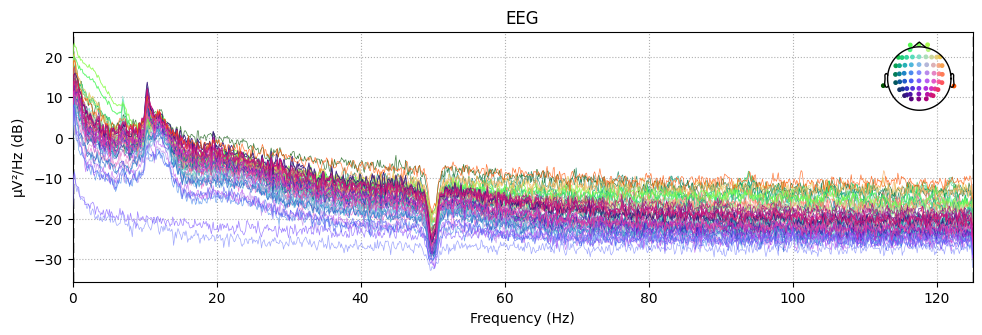

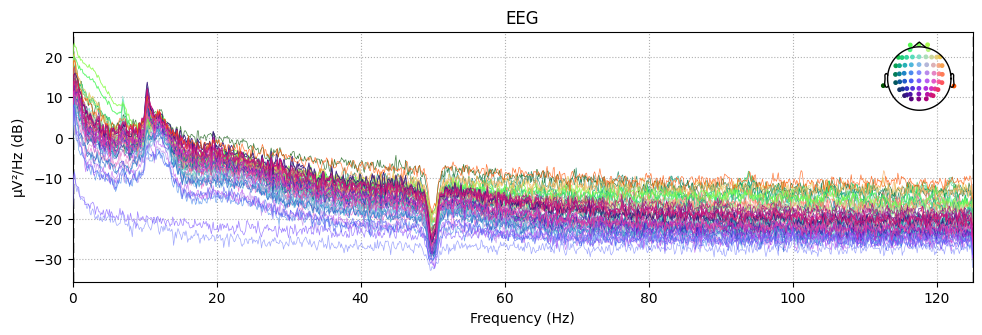

In [63]:
raw.plot_psd()

In [64]:
mne.find_events(raw)

40 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


array([[  125,     0,     1],
       [ 1625,     0,     2],
       [ 3125,     0,     3],
       [ 4625,     0,     4],
       [ 6125,     0,     5],
       [ 7625,     0,     6],
       [ 9125,     0,     7],
       [10625,     0,     8],
       [12125,     0,     9],
       [13625,     0,    10],
       [15125,     0,    11],
       [16625,     0,    12],
       [18125,     0,    13],
       [19625,     0,    14],
       [21125,     0,    15],
       [22625,     0,    16],
       [24125,     0,    17],
       [25625,     0,    18],
       [27125,     0,    19],
       [28625,     0,    20],
       [30125,     0,    21],
       [31625,     0,    22],
       [33125,     0,    23],
       [34625,     0,    24],
       [36125,     0,    25],
       [37625,     0,    26],
       [39125,     0,    27],
       [40625,     0,    28],
       [42125,     0,    29],
       [43625,     0,    30],
       [45125,     0,    31],
       [46625,     0,    32],
       [48125,     0,    33],
       [49

In [65]:
# Load raw data
# data_path = mne.datasets.ssvep.data_path()
# data_path = moabb.datasets.Nakanishi2015.data_path(subject = 1)

# bids_fname = (data_path)

# raw = mne.io.read_raw_brainvision(bids_fname, preload=True, verbose=False)
raw.info['line_freq'] = 60.

# Set montage
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage, verbose=False)

# Set common average reference
raw.set_eeg_reference('average', projection=False, verbose=False)

# Apply bandpass filter
raw.filter(l_freq=0.1, h_freq=None, fir_design='firwin', verbose=False)

# Construct epochs
event_id = {
    '9.2hz': 12
}
# events, _ = mne.events_from_annotations(raw, verbose=False)
events = mne.find_events(raw)
tmin, tmax = -1., 4.  # in s
baseline = None
epochs = mne.Epochs(
    raw, events=events,
    event_id=[event_id['9.2hz']], tmin=tmin,
    tmax=tmax, baseline=baseline, verbose=False)

ValueError: DigMontage is only a subset of info. There are 10 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'OZ'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

In [ ]:
tmin = 1.
tmax = 4.
fmin = 1.
fmax = 90.
sfreq = epochs.info['sfreq']

spectrum = epochs.compute_psd(
    'welch',
    n_fft=int(sfreq * (tmax - tmin)),
    n_overlap=0, n_per_seg=None,
    tmin=tmin, tmax=tmax,
    fmin=fmin, fmax=fmax,
    window='boxcar',
    verbose=False)
psds, freqs = spectrum.get_data(return_freqs=True)

In [ ]:
def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
    """Compute SNR spectrum from PSD spectrum using convolution.

    Parameters
    ----------
    psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Data object containing PSD values. Works with arrays as produced by
        MNE's PSD functions or channel/trial subsets.
    noise_n_neighbor_freqs : int
        Number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighbor_freqs : int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Array containing SNR for all epochs, channels, frequency bins.
        NaN for frequencies on the edges, that do not have enough neighbors on
        one side to calculate SNR.
    """
    # Construct a kernel that calculates the mean of the neighboring
    # frequencies
    averaging_kernel = np.concatenate((
        np.ones(noise_n_neighbor_freqs),
        np.zeros(2 * noise_skip_neighbor_freqs + 1),
        np.ones(noise_n_neighbor_freqs)))
    averaging_kernel /= averaging_kernel.sum()

    # Calculate the mean of the neighboring frequencies by convolving with the
    # averaging kernel.
    mean_noise = np.apply_along_axis(
        lambda psd_: np.convolve(psd_, averaging_kernel, mode='valid'),
        axis=-1, arr=psd
    )

    # The mean is not defined on the edges so we will pad it with nas. The
    # padding needs to be done for the last dimension only so we set it to
    # (0, 0) for the other ones.
    edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    mean_noise = np.pad(
        mean_noise, pad_width=pad_width, constant_values=np.nan
    )

    return psd / mean_noise

In [ ]:
snrs = snr_spectrum(psds, noise_n_neighbor_freqs=3,
                    noise_skip_neighbor_freqs=1)

In [ ]:
fig, axes = plt.subplots(2, 1, sharex='all', sharey='none', figsize=(8, 5))
freq_range = range(np.where(np.floor(freqs) == 1.)[0][0],
                   np.where(np.ceil(freqs) == fmax - 1)[0][0])

psds_plot = 10 * np.log10(psds)
psds_mean = psds_plot.mean(axis=(0, 1))[freq_range]
psds_std = psds_plot.std(axis=(0, 1))[freq_range]
axes[0].plot(freqs[freq_range], psds_mean, color='b')
axes[0].fill_between(
    freqs[freq_range], psds_mean - psds_std, psds_mean + psds_std,
    color='b', alpha=.2)
axes[0].set(title="PSD spectrum", ylabel='Power Spectral Density [dB]')

# SNR spectrum
snr_mean = snrs.mean(axis=(0, 1))[freq_range]
snr_std = snrs.std(axis=(0, 1))[freq_range]

axes[1].plot(freqs[freq_range], snr_mean, color='r')
axes[1].fill_between(
    freqs[freq_range], snr_mean - snr_std, snr_mean + snr_std,
    color='r', alpha=.2)
axes[1].set(
    title="SNR spectrum", xlabel='Frequency [Hz]',
    ylabel='SNR', ylim=[-2, 30], xlim=[fmin, fmax])
fig